In [2]:
import forward_simulation
import numpy as np
import matplotlib.pyplot as plt

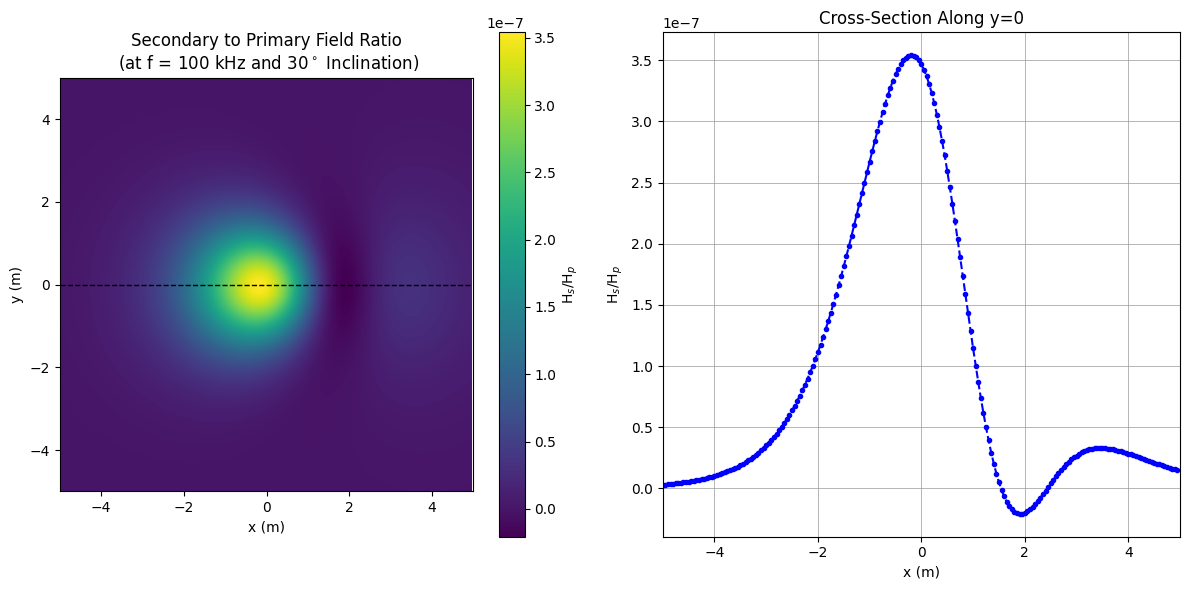

In [ ]:
f = np.logspace(2,5,20)
dx = 0.05
xmin = -5
xmax = 5

response = forward_simulation.fem_pipe(
    sigma=1.0e4,
    mu=4*np.pi*10**(-7),
    xc=-1.0,
    yc=0.0,
    zc=3.0,
    dincl=30.0,
    ddecl=90.0,
    dipole_dist=1.0,
    sensor_ht=0.05,
    f=f,
    xmin=xmin,
    xmax=xmax,
    dx=dx,
    N_loops=100,
    length=1.5,
    rad=0.5,
)

xp = np.arange(xmin, xmax, dx)
yp = np.arange(xmin, xmax, dx)
real_response = np.real(response[:, :, -1])
imag_response = np.imag(response[:, :, -1])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

kx = int(np.ceil(xp.size / 2.0))
ax[1].plot(yp[:], imag_response[kx, :], ".--b")
ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("H$_s$/H$_p$")
ax[1].set_title("Cross-Section Along y=0")
ax[1].grid(which="major", color="0.6", linestyle="-", linewidth="0.5")
ax[1].grid(which="minor", color="0.6", linestyle="-", linewidth="0.5")
ax[1].set_xlim(np.r_[xmin, xmax])

vminI = imag_response.min()
vmaxI = imag_response.max()
ax[0].plot(np.r_[xp.min(), xp.max()], np.zeros(2), "k--", lw=1)
clb = plt.colorbar(
    ax[0].imshow(
        imag_response,
        extent=[xp.min(), xp.max(), yp.min(), yp.max()],
        vmin=vminI,
        vmax=vmaxI,
    ),
    ax=ax[0],
)
ax[0].set_xlim(np.r_[xmin, xmax])
ax[0].set_ylim(np.r_[xmin, xmax])
ax[0].set_xlabel("x (m)")
ax[0].set_ylabel("y (m)")
ax[0].set_title("Secondary to Primary Field Ratio\n (at f = 100 kHz and 30$^\circ$ Inclination)")
clb.set_label("H$_s$/H$_p$")

plt.tight_layout()
plt.show()